In [1]:
from pprint import pprint
import numpy as np

Description rapide du dataset

In [2]:
from dataset import digits_dataset
print(digits_dataset)

Dataset: Optical recognition of handwritten digits dataset
Description: **Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is an integer 

In [3]:
from visualizer import Visualizer
vs = Visualizer()

Un affichage basique d'un nombre avec des *.

index = 0 et threshold = 8 (par défaut)

In [4]:
vs.show_number_matrix(0)

array([[' ', ' ', ' ', '*', '*', ' ', ' ', ' '],
       [' ', ' ', '*', '*', '*', '*', ' ', ' '],
       [' ', ' ', '*', ' ', ' ', '*', ' ', ' '],
       [' ', ' ', '*', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', '*', ' ', ' '],
       [' ', ' ', '*', ' ', ' ', '*', ' ', ' '],
       [' ', ' ', '*', ' ', '*', '*', ' ', ' '],
       [' ', ' ', ' ', '*', '*', ' ', ' ', ' ']], dtype='<U1')


Affichage de chaque nombre N fois.

• amount : N

• colored : False pour N&B True pour coloriage thermique

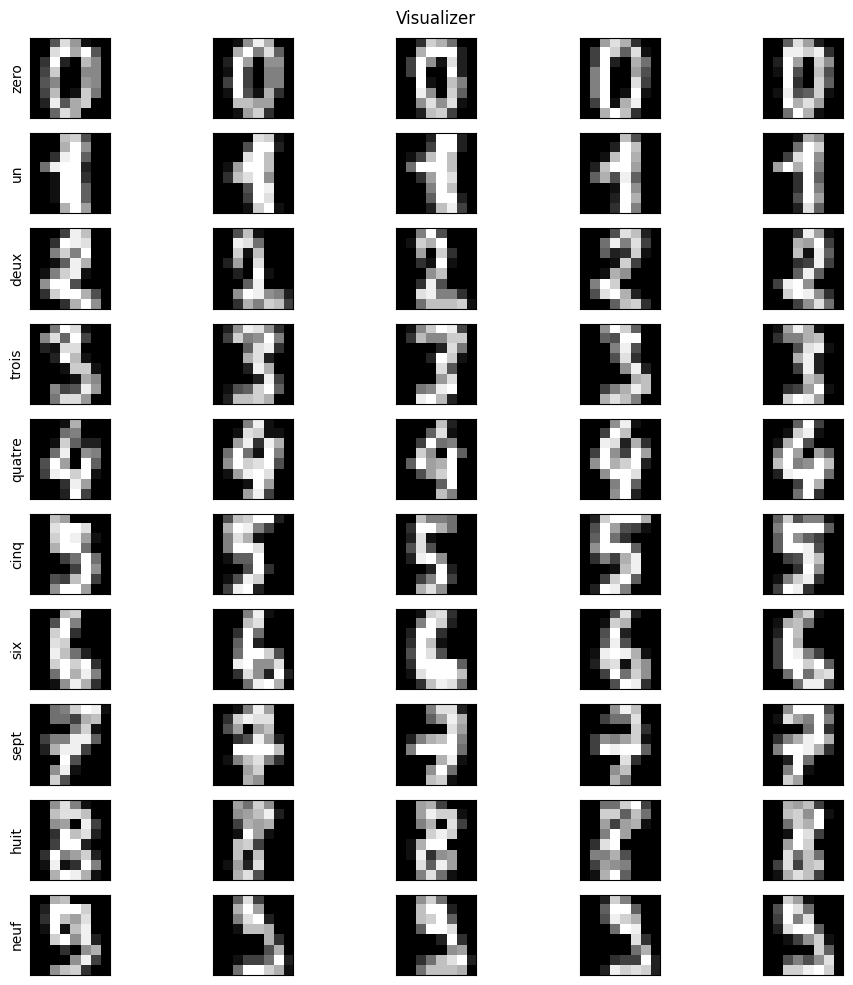

In [5]:
vs.show(amount = 5, colored = False)

Un petit résumé de notre clustering avec quelques métriques qui vont nous permettre de repérer les classes problématiques.

In [6]:
from kmeans import Kmeans
K = 10
kmeans = Kmeans(K)
kmeans.run()        # fit + summary saved in kmeans object

kmeans.summary()


Convergence reached after 29 iterations.
Kmeans with 10 clusters
Centroids: (10, 64)
Clusters: 1437 elements
Mean Accuracy: 82.42%
Cluster to Label Mapping: {0: 0, 1: 7, 2: 1, 3: 4, 4: 6, 5: 3, 6: 8, 7: 7, 8: 2, 9: 5}
Silhouette Score: 0.18024090092259842
Completeness Score: 0.762663710477715
Cluster Accuracies: {0: (0, 0.9861111111111112), 1: (7, 0.6049382716049383), 2: (1, 0.7874015748031497), 3: (4, 0.9848484848484849), 4: (6, 0.9657534246575342), 5: (3, 0.45098039215686275), 6: (8, 0.7894736842105263), 7: (7, 0.9038461538461539), 8: (2, 0.8027210884353742), 9: (5, 0.9658119658119658)}



['OK',
 'OK',
 'Predicted 1 but had 2 ',
 'OK',
 'OK',
 'Predicted 3 but had 5 ',
 'OK',
 'OK',
 'OK',
 'Predicted 3 but had 9 ',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'Predicted 3 but had 9 ',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'Predicted 3 but had 9 ',
 'OK',
 'Predicted 3 but had 9 ',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'Predicted 3 but had 9 ',
 'OK',
 'Predicted 3 but had 9 ',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'Predicted 8 but had 2 ',
 'Predicted 1 but had 2 ',
 'OK',
 'OK',
 'Predicted 1 but had 2 ',
 'OK',
 'OK',
 'Predicted 1 but had 2 ',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'Predicted 7 but had 9 ',
 'OK',
 'OK',
 'OK',
 'Predicted 3 but had 9 ',
 'OK',
 'Predicted 1 but had 2 ',
 'OK',
 'Predicted 1 but had 2 ',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'OK',
 'Predicted 3 but had 9 ',
 'OK',
 '

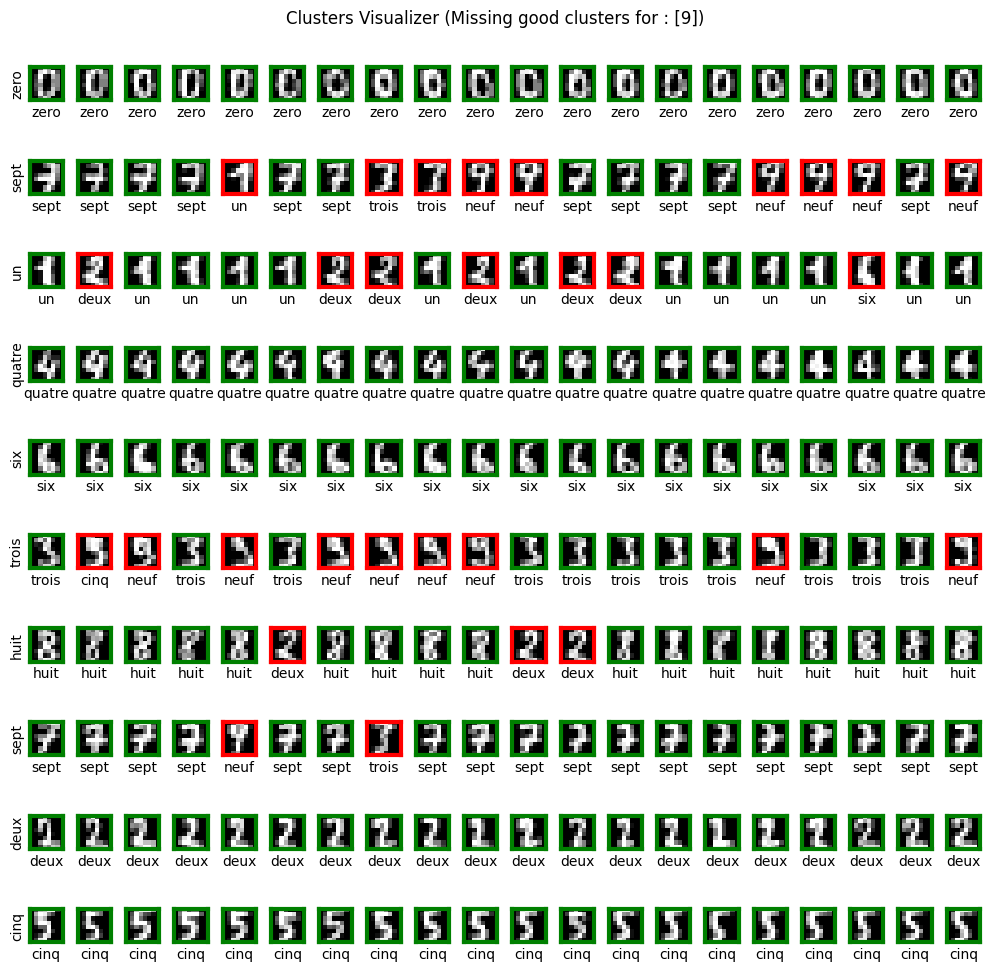

In [8]:
clusters = kmeans.clusters
map_clusters = kmeans.clusters_map
pprint(kmeans.predicted_table)
pprint(map_clusters)
x = [a for a in kmeans.predicted_table if a == "OK"]
print(len(x))
vs.show_clusters(clusters, map_clusters, 20, True, True)

On utilise l'algorithme t-SNE pour avoir une bonne représentation des clusters sous forme graphique.

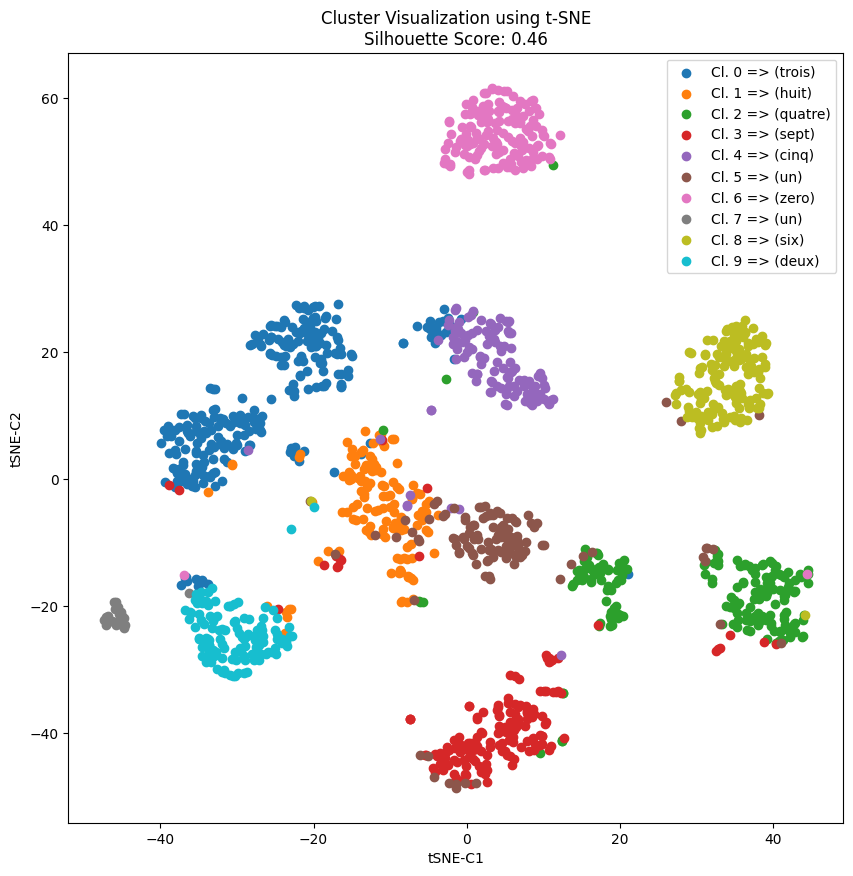

In [ ]:
vs.plot_clusters(kmeans)

Instinctivement on voudrait que ce soit 10 clusters qui suffisent et qu'on ait un cluster par chiffre

In [ ]:
k_values = range(2,50)
best_k = kmeans.find_best_k(k_values)


Convergence reached after 9 iterations.
Convergence reached after 18 iterations.
Convergence reached after 16 iterations.
Convergence reached after 15 iterations.
Convergence reached after 29 iterations.
Convergence reached after 42 iterations.
Convergence reached after 33 iterations.
Convergence reached after 30 iterations.
Convergence reached after 32 iterations.
Convergence reached after 32 iterations.
Convergence reached after 37 iterations.
Convergence reached after 11 iterations.
Convergence reached after 14 iterations.
Convergence reached after 40 iterations.
Convergence reached after 35 iterations.
Convergence reached after 12 iterations.
Convergence reached after 12 iterations.
Convergence reached after 17 iterations.
Convergence reached after 12 iterations.
Convergence reached after 28 iterations.
Convergence reached after 20 iterations.
Convergence reached after 25 iterations.
Convergence reached after 26 iterations.
Convergence reached after 20 iterations.
Convergence reach

In [ ]:
pprint(best_k)

[(13, 0.8694654325498479, 0.1727719219767468, 0.7402145839690376),
 (14, 0.8785435166702158, 0.1496080036403304, 0.7245520782984812),
 (15, 0.901073573311016, 0.15280749795655763, 0.7175728864774901),
 (16, 0.9090168089704639, 0.15228616868453548, 0.7155073323964497),
 (17, 0.9099298643092618, 0.14650574937482805, 0.6992197001598139),
 (18, 0.9190565806313111, 0.15196541979996883, 0.6951339578104894),
 (19, 0.9087356175992273, 0.14975487628920844, 0.6885129035266039),
 (20, 0.9135486191210356, 0.14595988212360453, 0.6754162733851058),
 (21, 0.897468885211587, 0.15469910704223863, 0.66557571085499),
 (22, 0.8971203715976941, 0.15409827410704807, 0.6577390162001652),
 (23, 0.9069353053210144, 0.1470770931856996, 0.6488604604339577),
 (24, 0.9113807999097304, 0.1424863197748403, 0.647585059020216),
 (25, 0.8937475366819483, 0.14734104688639635, 0.6401552151615081),
 (26, 0.9037475326988823, 0.14625195100938887, 0.6415270662185587),
 (27, 0.9119635916692269, 0.14694716798697133, 0.63927592

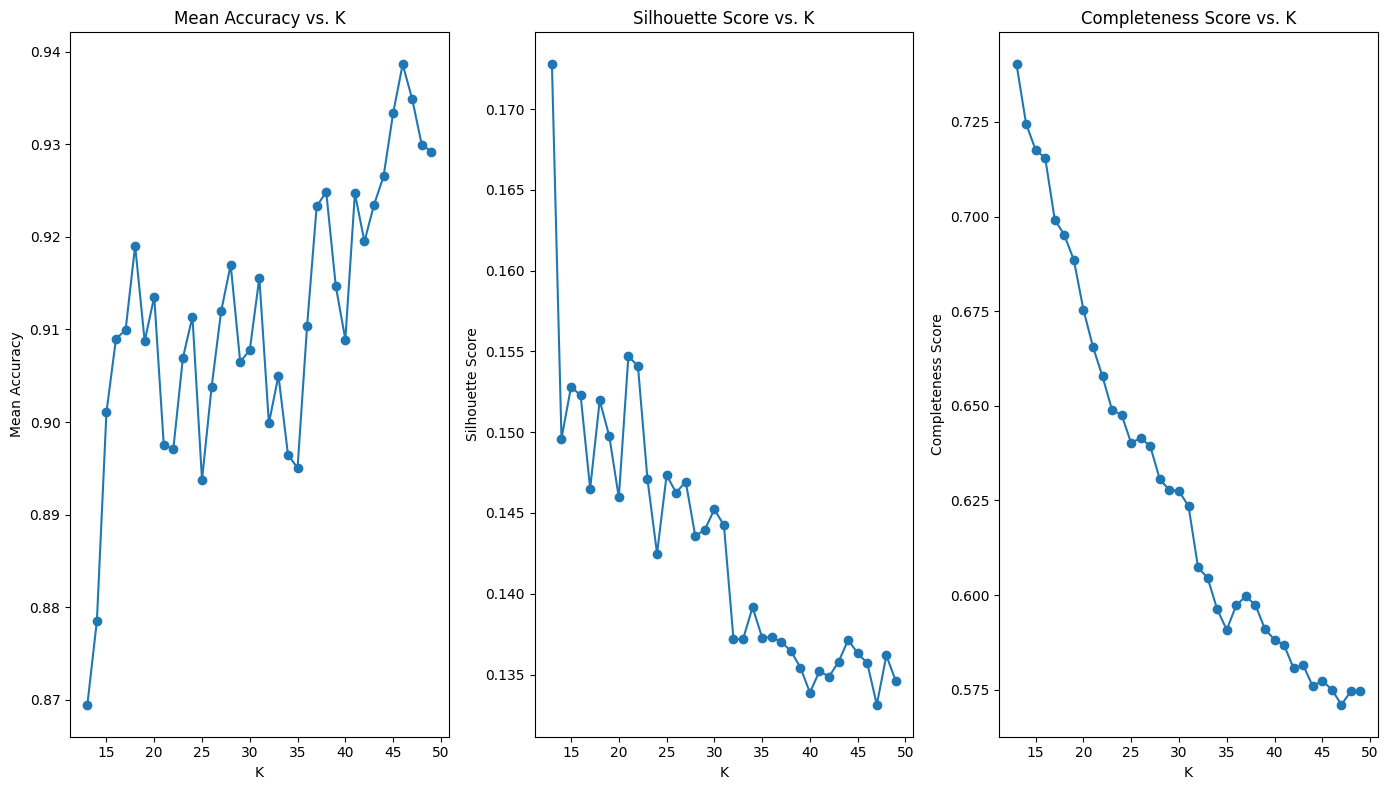

In [ ]:
vs.plot_best_k_metrics(best_k)

In [ ]:
k_opt = best_k[np.argmax([x[2] for x in best_k])][0]
kmeans_opt = Kmeans(k=k_opt)
kmeans_opt.run()

Convergence reached after 11 iterations.


In [ ]:
conf_matrix = kmeans_opt.confusion_matrix()
pprint(conf_matrix)

array([[143,   0,   0,   0,   1,   0,   1,   0,   0,   0],
       [  0, 153,   0,   0,   0,   1,   0,   0,   0,   0],
       [  1,  10, 112,   7,   0,   0,   0,   3,  10,   1],
       [  0,   2,   0, 127,   0,   2,   0,   7,   6,   5],
       [  0,   4,   0,   0, 122,   0,   0,   9,   0,   0],
       [  0,   0,   0,   2,   1, 106,   0,   0,   0,  26],
       [  0,   1,   0,   0,   0,   0, 145,   0,   0,   0],
       [  0,   4,   0,   0,   0,   0,   0, 141,   0,   0],
       [  0,  31,   2,   1,   0,   5,   2,   3,  99,   1],
       [  0,  17,   0,   5,   0,   4,   0,   5,   3, 106]], dtype=int64)


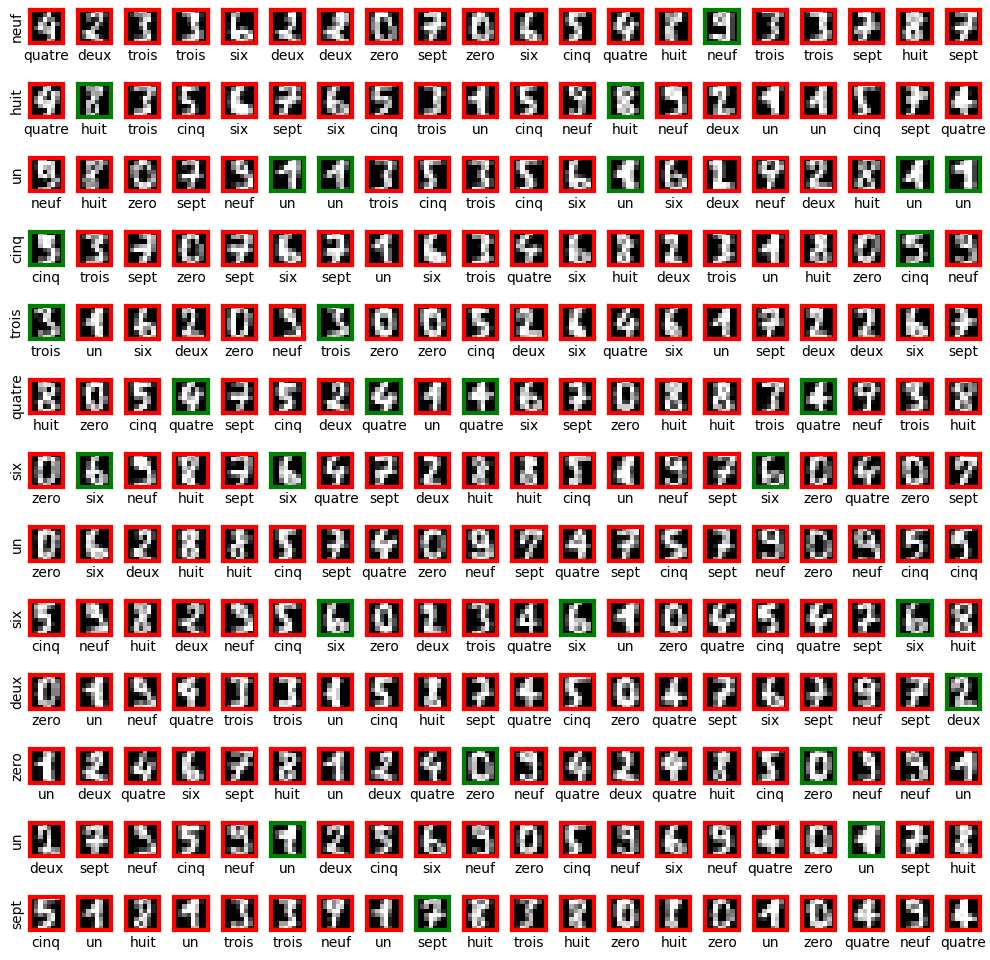

In [ ]:
clusters_opt = kmeans_opt.clusters
map_clusters_opt = kmeans_opt.clusters_map

vs.show_clusters(clusters_opt, map_clusters_opt, 20, True, True)

In [ ]:
kmeans_opt.summary()

Kmeans with 13 clusters
Centroids: (13, 64)
Clusters: 1437 elements
Mean Accuracy: 86.95%
Cluster to Label Mapping: {0: 9, 1: 8, 2: 1, 3: 5, 4: 3, 5: 4, 6: 6, 7: 1, 8: 6, 9: 2, 10: 0, 11: 1, 12: 7}
Silhouette Score: 0.1727719219767468
Completeness Score: 0.7402145839690376
Cluster Accuracies: {0: (9, 0.762589928057554), 1: (8, 0.8389830508474576), 2: (1, 0.6438356164383562), 3: (5, 0.8983050847457628), 4: (3, 0.8943661971830986), 5: (4, 0.9838709677419355), 6: (6, 1.0), 7: (1, 0.8148148148148148), 8: (6, 0.9629629629629629), 9: (2, 0.9824561403508771), 10: (0, 0.9930555555555556), 11: (1, 0.6885245901639344), 12: (7, 0.8392857142857143)}



In [ ]:
pprint(len(kmeans_opt.data))
pprint(len(kmeans_opt.test))
pprint(kmeans_opt.test)

1437
360
array([[ 0.,  0.,  0., ..., 14.,  5.,  0.],
       [ 0.,  0., 11., ...,  1.,  0.,  0.],
       [ 0.,  0.,  8., ...,  8.,  0.,  0.],
       ...,
       [ 0.,  0.,  7., ..., 10.,  0.,  0.],
       [ 0.,  0.,  7., ..., 16.,  4.,  0.],
       [ 0.,  0., 14., ...,  5.,  0.,  0.]])
